In [701]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import mysql.connector 
from mysql.connector import Error
import warnings 
warnings.filterwarnings('ignore')


In [702]:
# Read the csv Data:
df = pd.read_csv("C:/Users/Dhatch/Downloads/Luxury_Housing_Bangalore.csv")
df.head()


,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [703]:
# we know the how many columns in the data:
df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')

In [704]:
# Getting an idea about data types for columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [705]:
# As we can see most of the column str data types only ,
# but Ticket_Price_Cr column, Purchase_Quarter, those columns are not in correct data type we need to correct it.

In [706]:
# correct the datatype of those columns:

In [707]:
#Orders['ShipDate'] = pd.to_datetime(Orders['ShipDate'], format = "%d-%m-%Y") 
df['Purchase_Quarter'] = pd.to_datetime(df['Purchase_Quarter'], format = "%Y-%m-%d")

In [708]:
df['Purchase_Quarter'].dtype

dtype('<M8[ns]')

In [709]:
df['Ticket_Price_Cr'].unique()

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       ..., '13.730178633219271', '10.363988981166342',
       '10.415616832095246'], dtype=object)

In [710]:
# Removing the '₹ Cr ' symbols from the  Ticket Price column data: 

In [711]:
def Convert(val):
    if '₹' in str(val):
        val = (float(val[1:5])) 
        return val
    else:
        return val

In [712]:
df['Ticket_Price_Cr'] = df['Ticket_Price_Cr'].apply(Convert)

In [713]:
a= '₹9.18 Cr' 
print(a[1:5])

9.18


In [714]:
df['Ticket_Price_Cr'].unique()

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       ..., '13.730178633219271', '10.363988981166342',
       '10.415616832095246'], dtype=object)

In [715]:
df['Ticket_Price_Cr'] = df['Ticket_Price_Cr'].astype('float64')
df['Ticket_Price_Cr'] = df['Ticket_Price_Cr'].round(2)

In [716]:
df['Ticket_Price_Cr'] # making rounded value 2 decimal digit:

0         12.75
1         16.29
2         10.52
3          9.40
4         15.35
          ...  
100995    11.33
100996    10.83
100997    11.18
100998    10.91
100999    13.20
Name: Ticket_Price_Cr, Length: 101000, dtype: float64

In [717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           101000 non-null  object        
 1   Micro_Market          101000 non-null  object        
 2   Project_Name          101000 non-null  object        
 3   Developer_Name        101000 non-null  object        
 4   Unit_Size_Sqft        90954 non-null   float64       
 5   Configuration         101000 non-null  object        
 6   Ticket_Price_Cr       90981 non-null   float64       
 7   Transaction_Type      101000 non-null  object        
 8   Buyer_Type            101000 non-null  object        
 9   Purchase_Quarter      101000 non-null  datetime64[ns]
 10  Connectivity_Score    101000 non-null  float64       
 11  Amenity_Score         90910 non-null   float64       
 12  Possession_Status     101000 non-null  object        
 13 

In [718]:
df

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.75,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.29,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.52,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.40,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.35,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100995,PROP004730,BELLARY ROAD,Project_229,Embassy,8546.0,5Bhk+,11.33,Secondary,CXO,2024-12-31,8.552797,6.221131,Under construction,NRI Desk,no,7.511827,22,Will buy after possession.
100996,PROP059810,Bellary Road,Project_309,Brigade,3408.0,3bhk,10.83,Primary,CXO,2024-09-30,6.879269,9.783611,Ready to move,Direct,no,9.851849,26,Agent was not responsive.
100997,PROP065099,HENNUR ROAD,Project_98,RMZ,4691.0,4BHK,11.18,Primary,NRI,2023-12-31,6.753812,8.383013,Under construction,Broker,no,9.101604,44,Loved the amenities!
100998,PROP093022,rajajinagar,Project_21,Embassy,7435.0,3BHK,10.91,Secondary,Other,2024-06-30,4.437787,5.756247,Under construction,Broker,yes,8.588551,66,Excellent location!


In [719]:
# Getting an idea about wheather null values are there or not:
df.isnull().sum().any() 

np.True_

In [720]:
# if the true means there are some null values present in the data_set :

In [721]:
# Getting an idea about columns wise null values :
df.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft          10046
Configuration               0
Ticket_Price_Cr         10019
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10090
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18287
dtype: int64

In [722]:
# As we can see above code says there are four columns present in the null values :

In [723]:
# Getting an idea about null values percentage by column wise:
Null_percentage = df.isnull().sum()/len(df) * 100
Null_percentage

Property_ID              0.000000
Micro_Market             0.000000
Project_Name             0.000000
Developer_Name           0.000000
Unit_Size_Sqft           9.946535
Configuration            0.000000
Ticket_Price_Cr          9.919802
Transaction_Type         0.000000
Buyer_Type               0.000000
Purchase_Quarter         0.000000
Connectivity_Score       0.000000
Amenity_Score            9.990099
Possession_Status        0.000000
Sales_Channel            0.000000
NRI_Buyer                0.000000
Locality_Infra_Score     0.000000
Avg_Traffic_Time_Min     0.000000
Buyer_Comments          18.105941
dtype: float64

In [724]:

# we move ahead with imputation / replacement when the total amount of rows 
# with missing data are more than 5% OR if we do not have Sufficient data for analysis.


In [725]:
# If there is a data entry error mean is most affected , so thats why the industry preffered median for imputation. 
# if there is outliers in the data we never prefered mean ,rather than mean we preferred median only.  

In [726]:
# Imputation column 1: 
df['Unit_Size_Sqft'] = df['Unit_Size_Sqft'].fillna(df['Unit_Size_Sqft'].median()) 
df['Unit_Size_Sqft'].isnull().sum()


np.int64(0)

In [727]:
df.shape

(101000, 18)

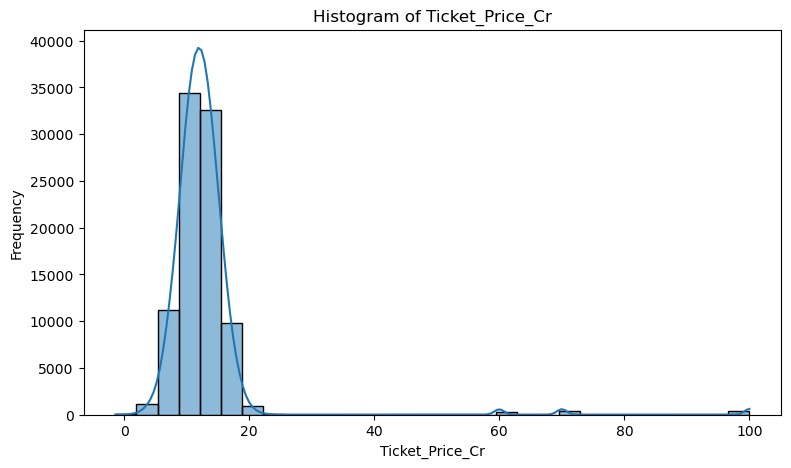

In [728]:
# Data visualization :
plt.figure(figsize = (9,5))
sns.histplot(df['Ticket_Price_Cr'], bins = 30, kde = True)
plt.title('Histogram of Ticket_Price_Cr')
plt.xlabel('Ticket_Price_Cr')
plt.ylabel('Frequency')
plt.show()

In [729]:
# Removing Outliers
#df =df[df['Ticket_Price_Cr'] <= 21]  
 



In [730]:
''' 
There is no outliers in the target column, All outliers are sucessfully removed

'''

' \nThere is no outliers in the target column, All outliers are sucessfully removed\n\n'

In [731]:
# Imputation column 2:
df = df.dropna(subset=['Ticket_Price_Cr'])

In [732]:
# conclution :

'''
in the total_price as we can see, it follows a bell shaped probability distribution 
and there are lot of of outliers in the right tail.

'''

'\nin the total_price as we can see, it follows a bell shaped probability distribution \nand there are lot of of outliers in the right tail.\n\n'

In [733]:
# total_price column have null values so all the null values removed sucessfully in the data:
df.shape

(90981, 18)

In [734]:
# Buyer's commends:
df['Buyer_Comments'] = df['Buyer_Comments'].fillna(df['Buyer_Comments'].mode()[0])
df['Buyer_Comments'].isnull().sum()

np.int64(0)

In [735]:
# Amenity_Score Imputing null values:
df['Amenity_Score'] = df['Amenity_Score'].fillna(df['Amenity_Score'].median())
df['Amenity_Score'].isnull().sum()

np.int64(0)

In [736]:
# checking null values for column wise:
df.isnull().sum().any()

np.False_

In [737]:
# np false means there is no Null values present in the data set:

In [738]:
# STEP #: 
# Getting an idea about duplicated rows:
df.duplicated().any()

np.True_

In [739]:
# if np.True means duplicates present in the dataset:
# we have to remove it from the dataset:
df = df.drop_duplicates() 
df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.75,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.29,Primary,Other,2024-06-30,4.839024,7.496555,Under construction,NRI Desk,no,7.723898,106,Great value for money.
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.52,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.40,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.35,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [740]:
df.duplicated().sum()

np.int64(0)

In [741]:
# As we can above output says there is no duplicated rows :

In [742]:
# Normalize text fields (Builder, Micro_Market)
df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.75,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.29,Primary,Other,2024-06-30,4.839024,7.496555,Under construction,NRI Desk,no,7.723898,106,Great value for money.
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.52,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.40,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.35,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [743]:
df['Micro_Market'].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'bellary road', 'Koramangala', 'YELAHANKA', 'whitefield',
       'sarjapur road', 'JP NAGAR', 'Rajajinagar', 'koramangala',
       'WHITEFIELD', 'indiranagar', 'jayanagar', 'Whitefield', 'DOMLUR',
       'yelahanka', 'Mg Road', 'HENNUR ROAD', 'Domlur', 'Electronic City',
       'Hebbal', 'mg road', 'jp nagar', 'Jayanagar', 'BANNERGHATTA ROAD',
       'MG ROAD', 'KANAKAPURA ROAD', 'HEBBAL', 'BELLARY ROAD',
       'ELECTRONIC CITY', 'Bellary Road', 'Hennur Road', 'rajajinagar',
       'electronic city', 'Kanakapura Road', 'INDIRANAGAR', 'hennur road',
       'kanakapura road', 'domlur', 'bannerghatta road', 'RAJAJINAGAR',
       'Yelahanka', 'hebbal', 'SARJAPUR ROAD', 'KORAMANGALA', 'Jp Nagar',
       'JAYANAGAR'], dtype=object)

In [744]:
# here micro market names are convert into tiltle format:
df['Micro_Market'] = df['Micro_Market'].str.title() 
df['Micro_Market'].unique()

array(['Sarjapur Road', 'Indiranagar', 'Bannerghatta Road',
       'Bellary Road', 'Koramangala', 'Yelahanka', 'Whitefield',
       'Jp Nagar', 'Rajajinagar', 'Jayanagar', 'Domlur', 'Mg Road',
       'Hennur Road', 'Electronic City', 'Hebbal', 'Kanakapura Road'],
      dtype=object)

In [745]:
# Renaming the column names:

df = df.rename(columns = {'Developer_Name' : 'Builder', 'Buyer_Type': 'Booking_Status'})
df.head()

,Property_ID,Micro_Market,Project_Name,Builder,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Booking_Status,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.75,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.29,Primary,Other,2024-06-30,4.839024,7.496555,Under construction,NRI Desk,no,7.723898,106,Great value for money.
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.52,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3BHK,9.40,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.35,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [746]:
# Derive columns like Price_per_Sqft, Quarter_Number, Booking_Flag

In [747]:
df['Price_per_Sqft'] = df['Ticket_Price_Cr'] * 10000000 /df['Unit_Size_Sqft']
df['Price_per_Sqft']

0        31677.018634
1        28281.250000
2        13649.928636
3        15180.878553
4        21477.543025
             ...     
99995    18360.360360
99996    38694.418165
99997    24522.236114
99998    14110.596568
99999    20773.524721
Name: Price_per_Sqft, Length: 90087, dtype: float64

In [748]:
df['Price_per_Sqft'] = df['Price_per_Sqft'].round(2)
df['Price_per_Sqft']

0        31677.02
1        28281.25
2        13649.93
3        15180.88
4        21477.54
           ...   
99995    18360.36
99996    38694.42
99997    24522.24
99998    14110.60
99999    20773.52
Name: Price_per_Sqft, Length: 90087, dtype: float64

In [749]:
# Extracting the quarter Number from the Purchase Quater column using dt.quater function :

In [750]:
df['Quarter_Number'] = df['Purchase_Quarter'].dt.quarter
df['Quarter_Number']

0        1
1        2
2        4
3        1
4        4
        ..
99995    4
99996    4
99997    3
99998    3
99999    3
Name: Quarter_Number, Length: 90087, dtype: int32

In [751]:
df['Transaction_Type'].unique()

array(['Primary', 'Secondary'], dtype=object)

In [752]:
# create a new column booking flag:
df['Booking_Flag'] = df['Transaction_Type'].replace({'Primary' : 1, 'Secondary' : 0})
df['Booking_Flag']

0        1
1        1
2        1
3        1
4        0
        ..
99995    1
99996    0
99997    1
99998    1
99999    1
Name: Booking_Flag, Length: 90087, dtype: int64

In [753]:
df.head()

,Property_ID,Micro_Market,Project_Name,Builder,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Booking_Status,Purchase_Quarter,...,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Price_per_Sqft,Quarter_Number,Booking_Flag
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.75,Primary,NRI,2025-03-31,...,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!,31677.02,1,1
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.29,Primary,Other,2024-06-30,...,7.496555,Under construction,NRI Desk,no,7.723898,106,Great value for money.,28281.25,2,1
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.52,Primary,HNI,2023-12-31,...,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.,13649.93,4,1
3,PROP000004,Bellary Road,Project_3,Embassy,6192.0,3BHK,9.40,Primary,HNI,2024-03-31,...,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!,15180.88,1,1
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.35,Secondary,HNI,2024-12-31,...,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.,21477.54,4,0


In [754]:
import mysql.connector 
from mysql.connector import Error
try:
    connection = mysql.connector.connect(
        host = 'localhost',
        user = 'root',
        password = '123456789',
        autocommit=True

    ) 

    if connection.is_connected():
        print("Connection to mysql is sucessful")
    
except Error as e:
    print('Error while connecting to MySQL.', e) 

Connection to mysql is sucessful


In [755]:
# Creating a cursor:
cursor = connection.cursor()
print("cursor is created", cursor)

cursor is created CMySQLCursor: (Nothing executed yet)


In [756]:
# Create a DataBase:
query = "CREATE DATABASE IF NOT EXISTS HOUSE_SALES"
cursor.execute(query)

In [757]:
# showing the databases:
query = "SHOW DATABASES"
cursor.execute(query)
for db in cursor:
    print(db)

('dhatch',)
('guvi',)
('guvi1',)
('house_sales',)
('information_schema',)
('mysql',)
('pd',)
('performance_schema',)
('phonepe',)
('poovithana',)
('sakila',)
('sys',)
('world',)


In [758]:
df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Builder',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Booking_Status', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments', 'Price_per_Sqft',
       'Quarter_Number', 'Booking_Flag'],
      dtype='object')

In [759]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90087 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Property_ID           90087 non-null  object        
 1   Micro_Market          90087 non-null  object        
 2   Project_Name          90087 non-null  object        
 3   Builder               90087 non-null  object        
 4   Unit_Size_Sqft        90087 non-null  float64       
 5   Configuration         90087 non-null  object        
 6   Ticket_Price_Cr       90087 non-null  float64       
 7   Transaction_Type      90087 non-null  object        
 8   Booking_Status        90087 non-null  object        
 9   Purchase_Quarter      90087 non-null  datetime64[ns]
 10  Connectivity_Score    90087 non-null  float64       
 11  Amenity_Score         90087 non-null  float64       
 12  Possession_Status     90087 non-null  object        
 13  Sales_Channel        

In [760]:
# Database selected 
query = "USE house_sales"
cursor.execute(query)

In [761]:
# Create a table :
query = """CREATE TABLE IF NOT EXISTS Luxury_house_sales (Property_ID VARCHAR(255), Micro_Market VARCHAR(255), Project_Name VARCHAR(255), Builder VARCHAR(255),
       Unit_Size_Sqft FLOAT , Configuration VARCHAR(255), Ticket_Price_Cr FLOAT ,
       Transaction_Type VARCHAR(255), Booking_Status VARCHAR(255), Purchase_Quarter DATE,
       Connectivity_Score FLOAT , Amenity_Score FLOAT , Possession_Status VARCHAR(255),
       Sales_Channel VARCHAR(255), NRI_Buyer VARCHAR(255), Locality_Infra_Score FLOAT,
       Avg_Traffic_Time_Min INT, Buyer_Comments VARCHAR(255), Price_per_Sqft FLOAT ,
       Quarter_Number INT, Booking_Flag INT)""" 
cursor.execute(query)

In [762]:
# view the table structure:
query = "DESCRIBE Luxury_house_sales"
cursor.execute(query)
table = cursor.fetchall()
print(table)

[('Property_ID', 'varchar(255)', 'YES', '', None, ''), ('Micro_Market', 'varchar(255)', 'YES', '', None, ''), ('Project_Name', 'varchar(255)', 'YES', '', None, ''), ('Builder', 'varchar(255)', 'YES', '', None, ''), ('Unit_Size_Sqft', 'float', 'YES', '', None, ''), ('Configuration', 'varchar(255)', 'YES', '', None, ''), ('Ticket_Price_Cr', 'float', 'YES', '', None, ''), ('Transaction_Type', 'varchar(255)', 'YES', '', None, ''), ('Booking_Status', 'varchar(255)', 'YES', '', None, ''), ('Purchase_Quarter', 'date', 'YES', '', None, ''), ('Connectivity_Score', 'float', 'YES', '', None, ''), ('Amenity_Score', 'float', 'YES', '', None, ''), ('Possession_Status', 'varchar(255)', 'YES', '', None, ''), ('Sales_Channel', 'varchar(255)', 'YES', '', None, ''), ('NRI_Buyer', 'varchar(255)', 'YES', '', None, ''), ('Locality_Infra_Score', 'float', 'YES', '', None, ''), ('Avg_Traffic_Time_Min', 'int', 'YES', '', None, ''), ('Buyer_Comments', 'varchar(255)', 'YES', '', None, ''), ('Price_per_Sqft', 'flo

In [763]:
# inserting a data:

data = df.values.tolist() 
query = "INSERT INTO Luxury_house_sales values (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
cursor.executemany(query, data)
connection.commit()


In [764]:
df.shape

(90087, 21)

In [765]:
try :
    if connection.is_connected():
        print("Cnnection was sucessful") 
finally:
    if connection.is_connected():
        connection.close()
        print("coonection is closed")


Cnnection was sucessful
coonection is closed
